<a href="https://colab.research.google.com/github/mantoan95/mantoan95/blob/main/Factor_Investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2639678409.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download(tickers, start_date, end_date)
[*********************100%***********************]  4 of 4 completed


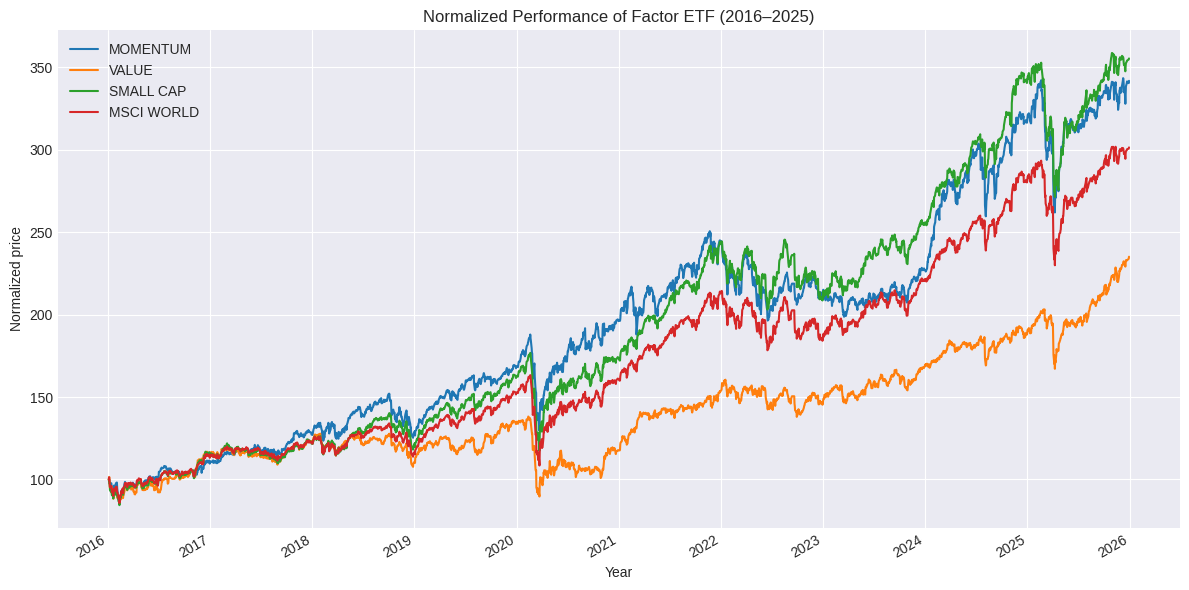


=== Performance Summary Table ===
            Annual Return (%)  Volatility (%)  Sharpe Ratio
Ticker                                                     
MOMENTUM                13.07           17.16          0.62
VALUE                    8.92           16.30          0.39
SMALL CAP               13.51           16.41          0.67
MSCI WORLD              11.66           15.57          0.59


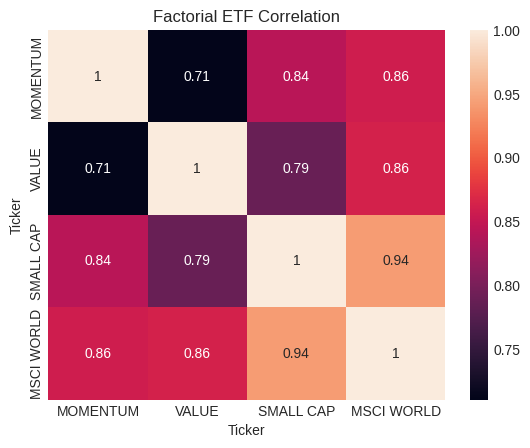

 
the correlation matrix shows perfect correlation between small cap and MSCI WORLD in this time period
 
Instead Value Factor and Momentum Factor seams not so much correlated: 0.7
 
So let s consider a mix portfolio with value and momentum and lets see the results in terms of risk adjusted return


 Balanced portfolio 50% value and 50% momentum performance


                    Annual Return (%)  Volatility (%)  Sharpe Ratio
Balanced Portfolio               11.0           15.47          0.55


In [1]:


# Financial Factor Analysis – Small Cap, Momentum, and Value
#
# Objective:
# This analysis aims to explore the main financial indicators for three key equity factors:
#   • Small Cap
#   • Momentum
#   • Value
#
# In addition to historical returns, we will analyze the correlation between these factors
# to evaluate potential diversification benefits and improvements in risk-adjusted returns
# when combining them in a mixed portfolio.
#
# As a benchmark, we will use the MSCI World Index.
#
# To simplify the analysis, we will focus on the following ETFs (Yahoo Finance tickers):
#   • SWDA – MSCI World Index
#   • SPY5– Small Cap Factor
#   • IWMO – Momentum Factor
#   • IWVL – Value Factor


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import requests, zipfile, io

tickers= ['SWDA.MI','SPY5.MI','IWMO.MI', 'IWVL.MI']
start_date='2016-01-01'
end_date='2025-12-31'
data= yf.download(tickers, start_date, end_date)
data=data.ffill().bfill()
index_price=data['Close']
new_name= {
    'SWDA.MI': 'MSCI WORLD',
    'IWMO.MI': 'MOMENTUM',
    'IWVL.MI': 'VALUE',
    'SPY5.MI': 'SMALL CAP'
             }
index_price2= index_price.rename(columns=new_name)
price_norm=index_price2/index_price2.iloc[0]*100

plt.style.use('seaborn-v0_8-darkgrid')
price_norm.plot(figsize=(12, 6))
plt.title('Normalized Performance of Factor ETF (2016–2025)')
plt.xlabel('Year')
plt.ylabel('Normalized price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("etf_fattoriali.png", dpi=300)
plt.show()



returns = index_price2.pct_change()
n=(pd.to_datetime(end_date) - pd.to_datetime(start_date)).days / 365
annual_return= (index_price2.iloc[-1]/index_price2.iloc[0])**(1/n)-1

annualized_volatility = returns.std() * np.sqrt(252)
correlation= returns.corr()


#Manual definition of the risk free ratio. Change the number based on your considerations.
risk_free_ratio=0.025
sharpe_ratio=(annual_return-risk_free_ratio)/annualized_volatility



summary_df = pd.DataFrame({
    'Annual Return (%)': (annual_return * 100).round(2),
    'Volatility (%)': (annualized_volatility * 100).round(2),
    'Sharpe Ratio': sharpe_ratio.round(2)
})
print("\n=== Performance Summary Table ===")
print(summary_df)



sns.heatmap(correlation,annot=True)
plt.title('Factorial ETF Correlation')
plt.show()

print(' \nthe correlation matrix shows perfect correlation between small cap and MSCI WORLD in this time period')
print(' \nInstead Value Factor and Momentum Factor seams not so much correlated: 0.7')
print(' \nSo let s consider a mix portfolio with value and momentum and lets see the results in terms of risk adjusted return')

value_weight=0.5
momentum_weight=0.5
portfoliomix_return= value_weight*annual_return['VALUE']+momentum_weight*annual_return['MOMENTUM']

portfolio_calculation=returns['VALUE']*value_weight+returns['MOMENTUM']*momentum_weight
volatility2= portfolio_calculation.std()*np.sqrt(252)

sharpe_ratio2= (portfoliomix_return-risk_free_ratio)/volatility2

summary_balance= pd.DataFrame({
    'Annual Return (%)': [(portfoliomix_return * 100).round(2)],
    'Volatility (%)': [(volatility2 * 100).round(2)],
    'Sharpe Ratio': [sharpe_ratio2.round(2)]},index=['Balanced Portfolio']
)

print('\n\n Balanced portfolio 50% value and 50% momentum performance')
print('\n')
print(summary_balance)
